Import Required Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Load and Display the Image

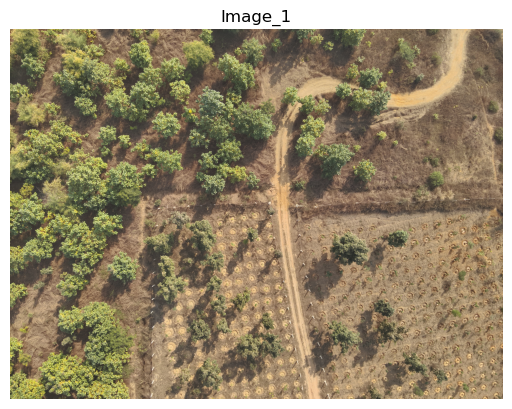

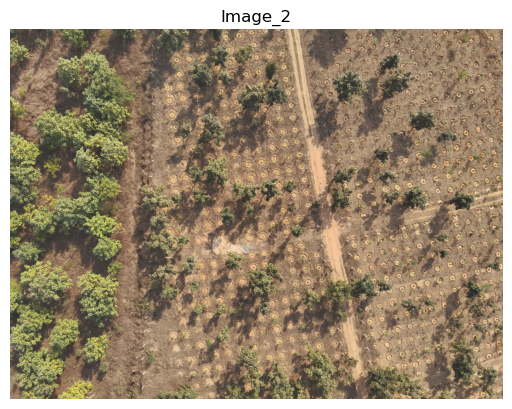

In [5]:
# Load the image using OpenCV
image2 =cv2.imread(r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing\2_post-SW\DJI_20241229133640_0198_V.JPG")
image1 = cv2.imread(r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing\2_post-SW\DJI_20241229133646_0201_V.JPG")
image_rgb_1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display purposes
image_rgb_2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
# Display the original image
plt.imshow(image_rgb_1)
plt.title("Image_1")
plt.axis("off")
plt.show()
plt.imshow(image_rgb_2)
plt.title("Image_2")
plt.axis("off")
plt.show()

 Increase Contrast of the Original Image

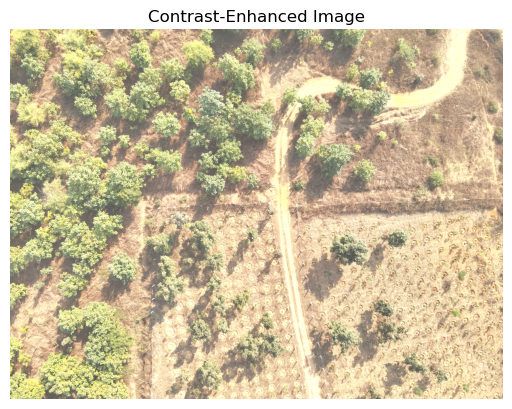

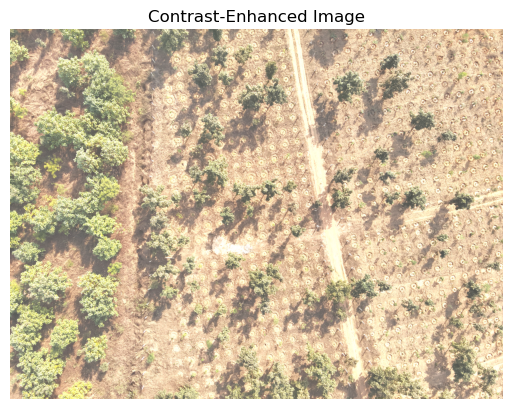

In [12]:
# Increase contrast using cv2.convertScaleAbs
alpha = 1.3  # Contrast control (1.0-3.0)
beta = 30    # Brightness control (0-100)

enhanced_image_1 = cv2.convertScaleAbs(image1, alpha=alpha, beta=beta)
enhanced_image_2 = cv2.convertScaleAbs(image2, alpha=alpha, beta=beta)

# Convert to RGB for display
enhanced_image_rgb_1 = cv2.cvtColor(enhanced_image_1, cv2.COLOR_BGR2RGB)
enhanced_image_rgb_2 = cv2.cvtColor(enhanced_image_2, cv2.COLOR_BGR2RGB)

# Display the enhanced image
plt.imshow(enhanced_image_rgb_1)
plt.title("Contrast-Enhanced Image")
plt.axis("off")
plt.show()
plt.imshow(enhanced_image_rgb_2)
plt.title("Contrast-Enhanced Image")
plt.axis("off")
plt.show()


Define the Green Color Range

In [18]:
# Convert the image to HSV color space
hsv_image_1 = cv2.cvtColor(enhanced_image_1, cv2.COLOR_BGR2HSV)
hsv_image_2 = cv2.cvtColor(enhanced_image_2, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for green color
lower_green = np.array([35, 50, 50])  # Adjust values for light green
upper_green = np.array([85, 255, 255])  # Adjust values for dark green


Create a Mask for Green Areas

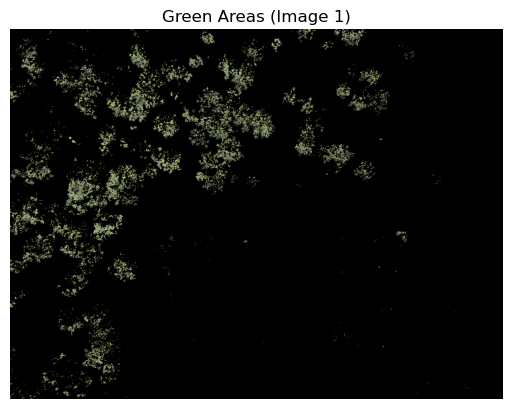

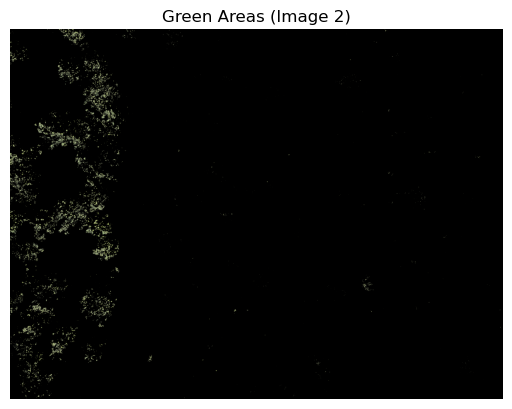

In [19]:
# Create masks for the green areas in both images
mask_1 = cv2.inRange(hsv_image_1, lower_green, upper_green)
mask_2 = cv2.inRange(hsv_image_2, lower_green, upper_green)

# Apply the masks to the original enhanced images
green_parts_1 = cv2.bitwise_and(enhanced_image_rgb_1, enhanced_image_rgb_1, mask=mask_1)
green_parts_2 = cv2.bitwise_and(enhanced_image_rgb_2, enhanced_image_rgb_2, mask=mask_2)

# Display the green parts for the first image
plt.imshow(green_parts_1)
plt.title("Green Areas (Image 1)")
plt.axis("off")
plt.show()

# Display the green parts for the second image
plt.imshow(green_parts_2)
plt.title("Green Areas (Image 2)")
plt.axis("off")
plt.show()


In [ ]:
# Count green pixels in the updated mask
green_pixel_count = cv2.countNonZero(mask)

# Calculate the percentage of green area
total_pixel_count = enhanced_image.shape[0] * enhanced_image.shape[1]
green_area_percentage = (green_pixel_count / total_pixel_count) * 100

print(f"Updated Total Green Area: {green_pixel_count} pixels")
print(f"Updated Percentage of Green Area: {green_area_percentage:.2f}%")


Greenery Percentage in Image 1: 6.61%
Greenery Percentage in Image 2: 2.13%


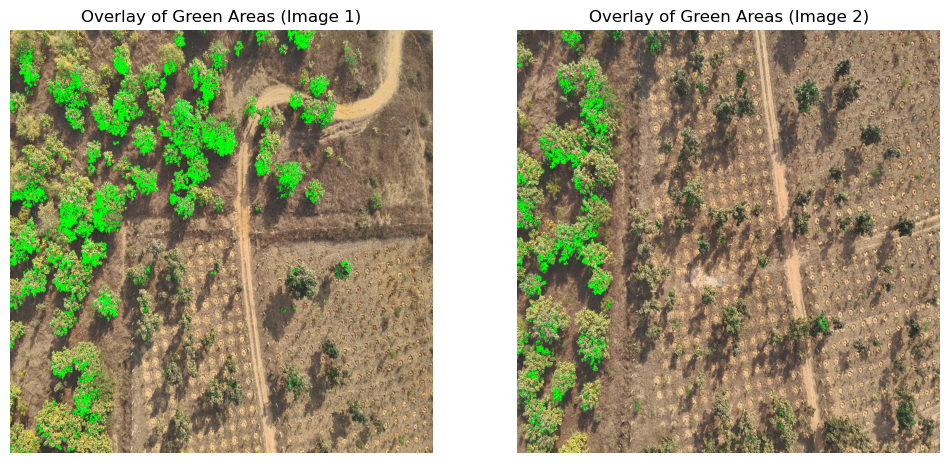

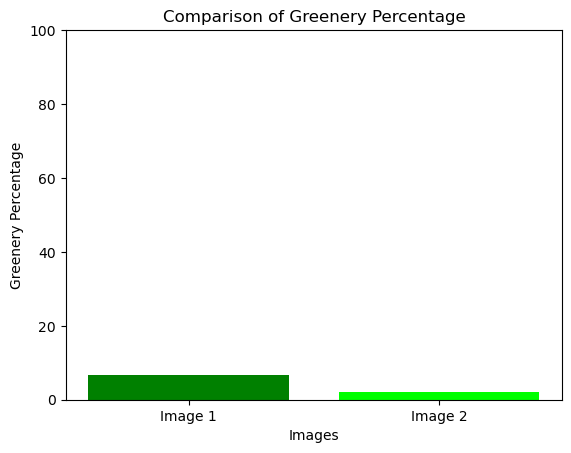

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
image_2 =cv2.imread(r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing\2_post-SW\DJI_20241229133640_0198_V.JPG")
image_1 = cv2.imread(r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing\2_post-SW\DJI_20241229133646_0201_V.JPG")
# Resize images to the same dimensions (if necessary)
image_1 = cv2.resize(image_1, (800, 800))
image_2 = cv2.resize(image_2, (800, 800))

# Convert images to HSV color space
hsv_image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2HSV)
hsv_image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for green color
lower_green = np.array([35, 50, 50])  # Light green
upper_green = np.array([85, 255, 255])  # Dark green

# Create masks for green areas
mask_1 = cv2.inRange(hsv_image_1, lower_green, upper_green)
mask_2 = cv2.inRange(hsv_image_2, lower_green, upper_green)

# Calculate the percentage of greenery in each image
green_area_1 = np.sum(mask_1 > 0)
green_area_2 = np.sum(mask_2 > 0)

total_area_1 = mask_1.shape[0] * mask_1.shape[1]
total_area_2 = mask_2.shape[0] * mask_2.shape[1]

green_percentage_1 = (green_area_1 / total_area_1) * 100
green_percentage_2 = (green_area_2 / total_area_2) * 100

# Print the results
print(f"Greenery Percentage in Image 1: {green_percentage_1:.2f}%")
print(f"Greenery Percentage in Image 2: {green_percentage_2:.2f}%")

# Overlay the mask on the original images for visualization
overlay_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB).copy()
overlay_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB).copy()

overlay_1[mask_1 > 0] = [0, 255, 0]  # Highlight green areas with bright green
overlay_2[mask_2 > 0] = [0, 255, 0]  # Highlight green areas with bright green

# Display the overlay image for Image 1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(overlay_1)
plt.title("Overlay of Green Areas (Image 1)")
plt.axis("off")

# Display the overlay image for Image 2
plt.subplot(1, 2, 2)
plt.imshow(overlay_2)
plt.title("Overlay of Green Areas (Image 2)")
plt.axis("off")
plt.show()

# Plot a bar graph to compare the greenery percentages
labels = ['Image 1', 'Image 2']
percentages = [green_percentage_1, green_percentage_2]

plt.bar(labels, percentages, color=['green', 'lime'])
plt.xlabel('Images')
plt.ylabel('Greenery Percentage')
plt.title('Comparison of Greenery Percentage')
plt.ylim(0, 100)
plt.show()


Greenery Percentage in Image 1: 6.61%
Greenery Percentage in Image 2: 2.13%


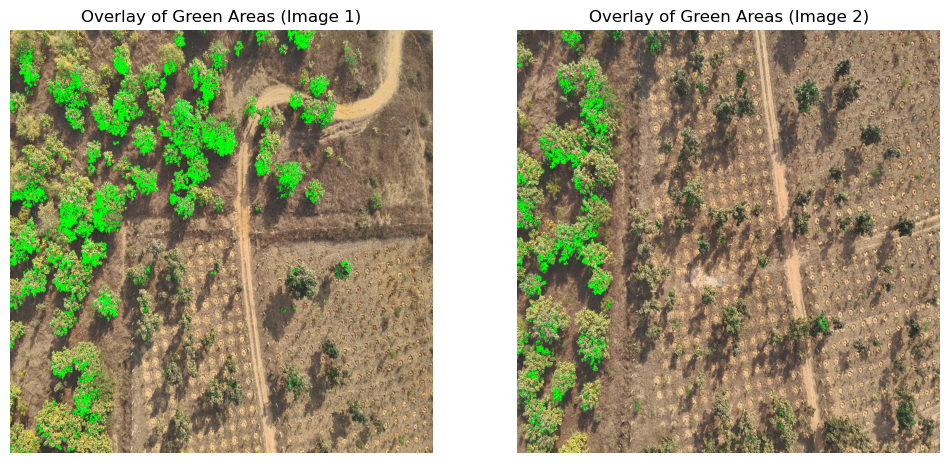

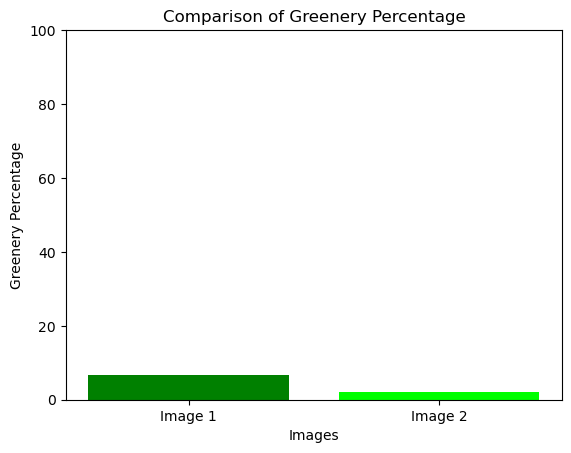

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the two images
image_2 =cv2.imread(r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing\2_post-SW\DJI_20241229133640_0198_V.JPG")
image_1 = cv2.imread(r"C:\Users\adarsh\Downloads\GREEN AI\PROJECT\FASHION-MNIST-CLASSIFICATION\tree_dataset\testing\2_post-SW\DJI_20241229133646_0201_V.JPG")

# Resize images to consistent dimensions (e.g., 800x800)
image_1_resized = cv2.resize(image_1, (800, 800))
image_2_resized = cv2.resize(image_2, (800, 800))

# Convert the resized images to RGB for Matplotlib display
image_1_rgb = cv2.cvtColor(image_1_resized, cv2.COLOR_BGR2RGB)
image_2_rgb = cv2.cvtColor(image_2_resized, cv2.COLOR_BGR2RGB)

# Convert the resized images to HSV color space for color masking
hsv_image_1 = cv2.cvtColor(image_1_resized, cv2.COLOR_BGR2HSV)
hsv_image_2 = cv2.cvtColor(image_2_resized, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds for green color
lower_green = np.array([35, 50, 50])  # Light green
upper_green = np.array([85, 255, 255])  # Dark green

# Create masks for green areas on the resized images
mask_1 = cv2.inRange(hsv_image_1, lower_green, upper_green)
mask_2 = cv2.inRange(hsv_image_2, lower_green, upper_green)

# Calculate the percentage of greenery in each image
green_area_1 = np.sum(mask_1 > 0)
green_area_2 = np.sum(mask_2 > 0)

total_area_1 = mask_1.shape[0] * mask_1.shape[1]
total_area_2 = mask_2.shape[0] * mask_2.shape[1]

green_percentage_1 = (green_area_1 / total_area_1) * 100
green_percentage_2 = (green_area_2 / total_area_2) * 100

# Print the results
print(f"Greenery Percentage in Image 1: {green_percentage_1:.2f}%")
print(f"Greenery Percentage in Image 2: {green_percentage_2:.2f}%")

# Overlay the masks on the RGB images for visualization
overlay_1 = image_1_rgb.copy()
overlay_2 = image_2_rgb.copy()

overlay_1[mask_1 > 0] = [0, 255, 0]  # Highlight green areas with bright green
overlay_2[mask_2 > 0] = [0, 255, 0]  # Highlight green areas with bright green

# Display the overlay images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(overlay_1)
plt.title("Overlay of Green Areas (Image 1)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(overlay_2)
plt.title("Overlay of Green Areas (Image 2)")
plt.axis("off")
plt.show()

# Plot a bar graph to compare the greenery percentages
labels = ['Image 1', 'Image 2']
percentages = [green_percentage_1, green_percentage_2]

plt.bar(labels, percentages, color=['green', 'lime'])
plt.xlabel('Images')
plt.ylabel('Greenery Percentage')
plt.title('Comparison of Greenery Percentage')
plt.ylim(0, 100)
plt.show()
